In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image=cv2.imread("/content/drive/MyDrive/ECG Images Final/medicakolkata_ccu1_mon--7_2022_6_8_13_1_15.jpeg")

# image1=image.copy()
# # cv2_imshow(image)
# image[50:500,200:900]=0

In [ ]:
def correct_rotation(image):

    edges = cv2.Canny(image, 50, 150)

    # Apply Hough Transform to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    # Accumulator space for line orientations
    angles = []

    # Collect angles from detected lines
    for line in lines:
        for rho, theta in line:
            angles.append(theta)

    # Calculate the most common angle
    dominant_angle = -np.percentile(angles, 15)

    # Convert radians to degrees and correct rotation
    # rotation_angle_degrees = np.degrees(dominant_angle)
    # rotated_image = rotate_image(image, rotation_angle_degrees)

    return dominant_angle

def rotate_image(image, angle):
    # Get image center
    center = tuple(np.array(image.shape[1::-1]) / 2)

    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Apply rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)

    return rotated_image

angle=correct_rotation(image)
# len(angle)
cv2_imshow(rotate_image(image1, angle))

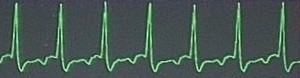

(78, 300, 3)

In [ ]:
image=cv2.imread("medicakolkata_ccu3_mon--10_2022_5_30_0_3_53.jpeg")
cv2_imshow(image)
image.shape

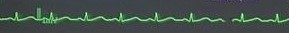

(33, 289, 3)

In [ ]:
imagex=cv2.imread("medicakolkata_ccu2_mon--6_2022_6_20_17_5_8.jpeg")
cv2_imshow(imagex)
imagex.shape

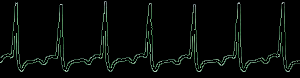

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (3,3), 1)
low_threshold = 100
high_threshold = 150
edges = cv2.Canny(blurred_image, low_threshold, high_threshold)
canvas = np.zeros_like(image)
canvas[edges > 0] = image[edges > 0]
# cv2_imshow(image)
cv2_imshow(canvas)

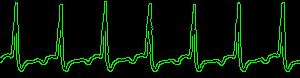

In [ ]:
# Find contours in the edged image
contours, _ = cv2.findContours(edges.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a canvas for drawing boundaries
canvas = np.zeros_like(image)

# Draw boundaries on the canvas
cv2.drawContours(canvas, contours, -1, (0, 255, 0), -1)  # You can change the color and thickness as per your preference

# Display the result
cv2_imshow(canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

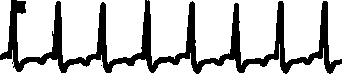

In [ ]:
new_image = np.full_like(image, 255)
cv2.drawContours(new_image, contours, -1, (0, 0, 0), -2)  # You can change the color and thickness as per your preference
cv2_imshow(new_image)

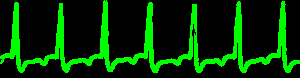

In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur for smoothing
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Define Prewitt operators
prewitt_x = cv2.filter2D(blurred_image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(blurred_image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

# Compute the gradient magnitude
edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Thresholding
low_threshold = 100
high_threshold = 150
edges[edges < low_threshold] = 0
edges[edges > high_threshold] = 255

# Find contours in the edged image
contours, _ = cv2.findContours(edges.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a canvas
canvas = np.zeros_like(image)

# Draw contours on the canvas
cv2.drawContours(canvas, contours, -1, (0, 255, 0), -1)  # You can change the color and thickness as per your preference

# Display the result
cv2_imshow(canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

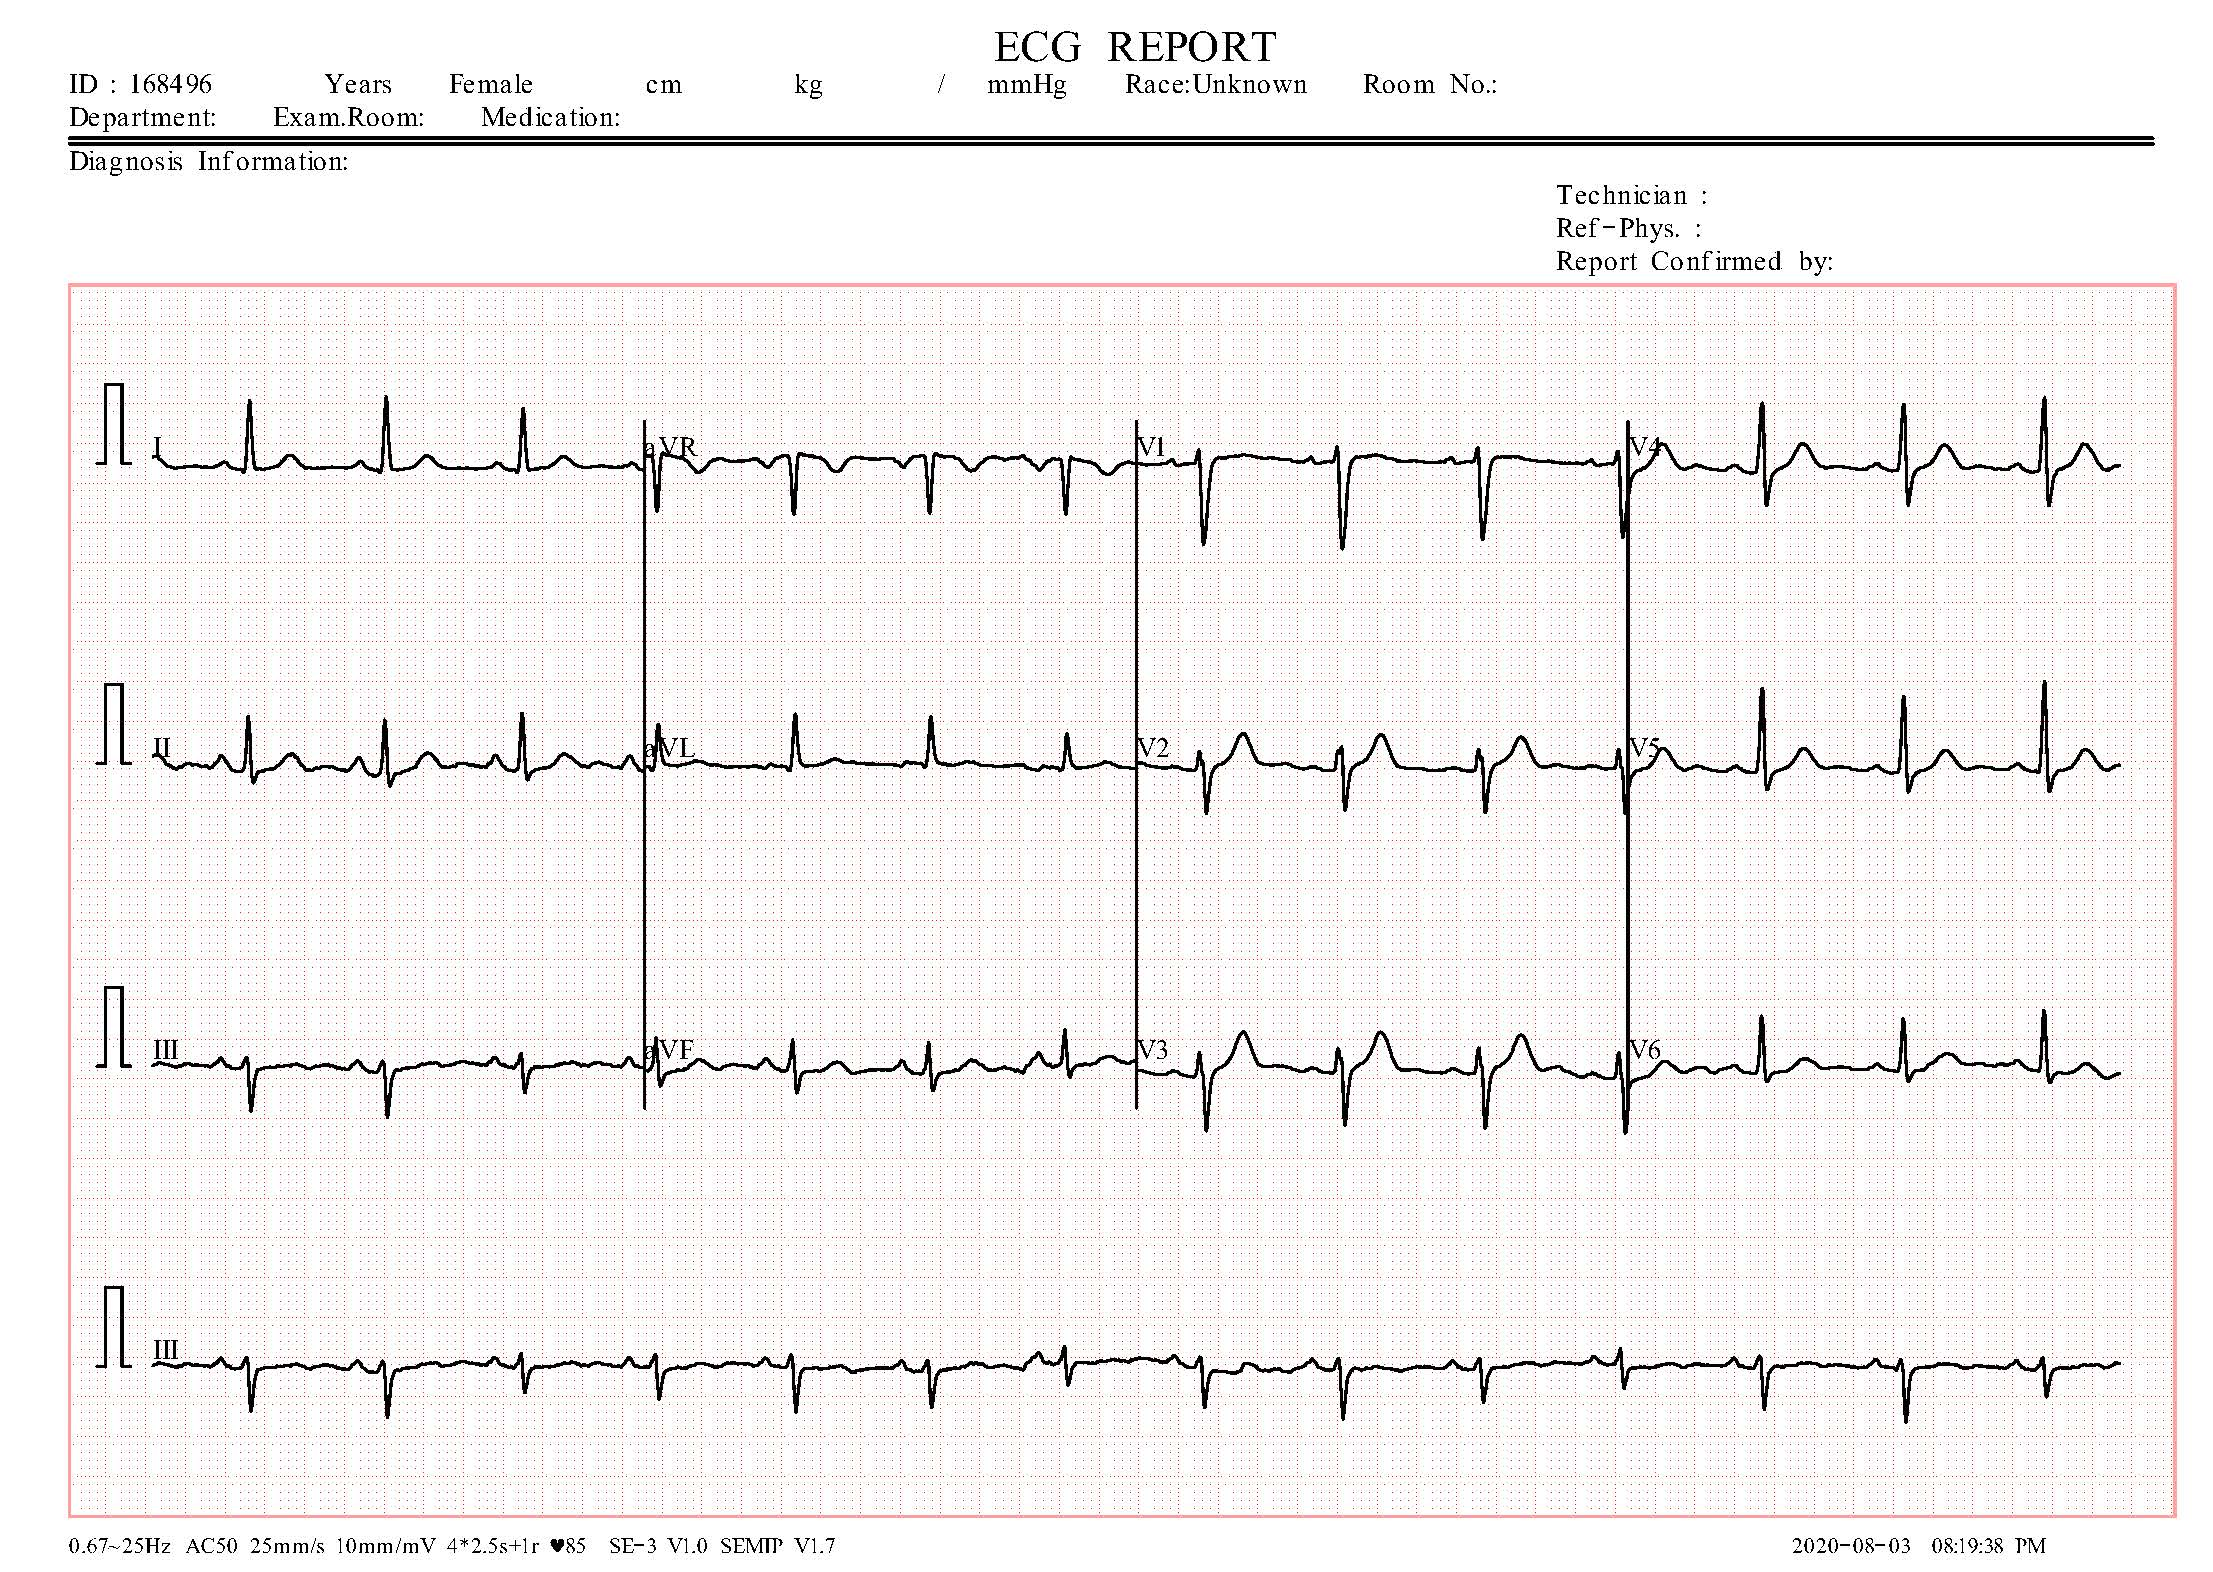

In [ ]:
# Load the image
image2 = cv2.imread('Normal (136).jpg')
cv2_imshow(image2)

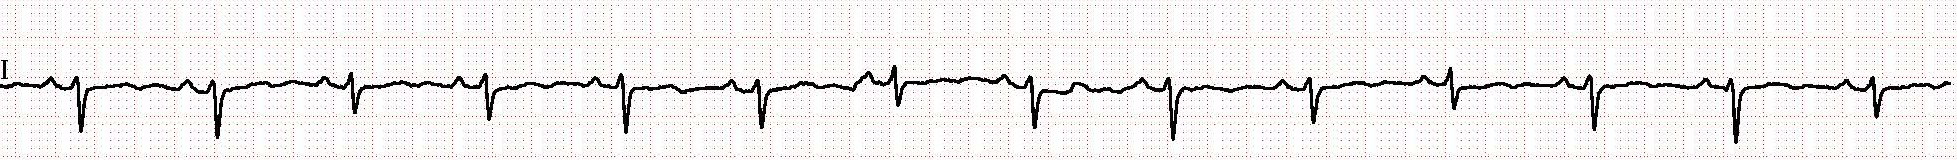

In [ ]:
image3 = image2[1280:1440,170:2127]
cv2_imshow(image3)
# image2.shape

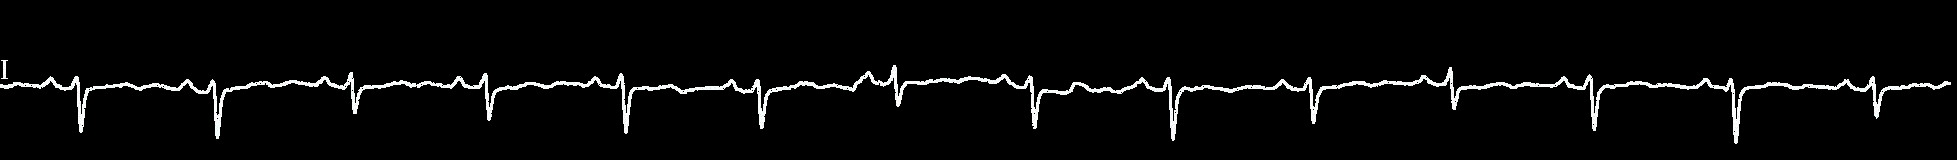

In [ ]:
def make_colors_white(img, threshold=30):
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary mask
    _, mask = cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY)

    # Convert the binary mask to BGR format
    mask_bgr = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Create the result by blending the original image and the mask
    result = cv2.addWeighted(img, 1, mask_bgr, 1, 0)

    return result

# Call the function to make colors beyond the threshold white
new_image = make_colors_white(image3, threshold_value)

# Invert the colors (switch black to white and white to black)


cv2_imshow(inverted_image)

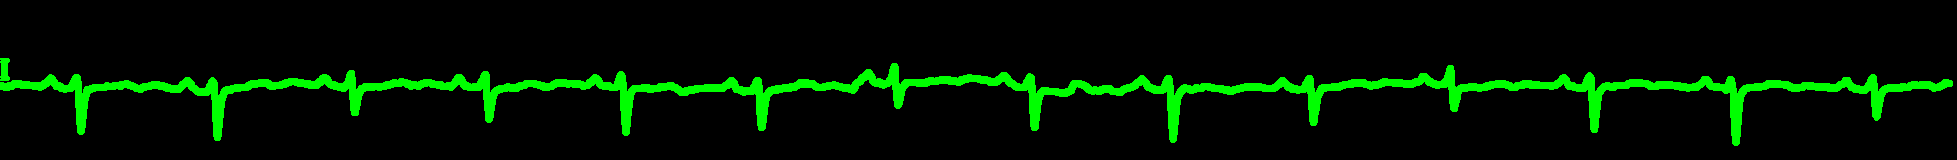

In [ ]:
def Boundary_detection(new_image):
  inverted_image = cv2.bitwise_not(new_image)

  # Convert the image to grayscale
  gray_image = cv2.cvtColor(inverted_image, cv2.COLOR_BGR2GRAY)

  # Apply GaussianBlur for smoothing
  blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

  # Define Prewitt operators
  prewitt_x = cv2.filter2D(blurred_image, cv2.CV_64F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
  prewitt_y = cv2.filter2D(blurred_image, cv2.CV_64F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

  # Compute the gradient magnitude
  edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

  # Thresholding
  low_threshold = 50
  high_threshold = 150
  edges[edges < low_threshold] = 0
  edges[edges > high_threshold] = 255

  # Find contours in the edged image
  contours, _ = cv2.findContours(edges.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a canvas
  canvas = np.zeros_like(inverted_image)

  # Draw contours on the canvas
  cv2.drawContours(canvas, contours, -1, (0, 255, 0), -1)  # You can change the color and thickness as per your preference

  return canvas

cv2_imshow(Boundary_detection(new_image))

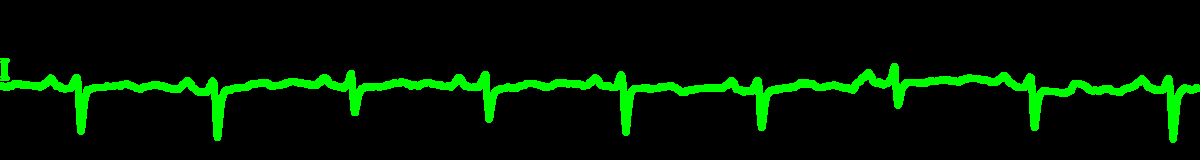

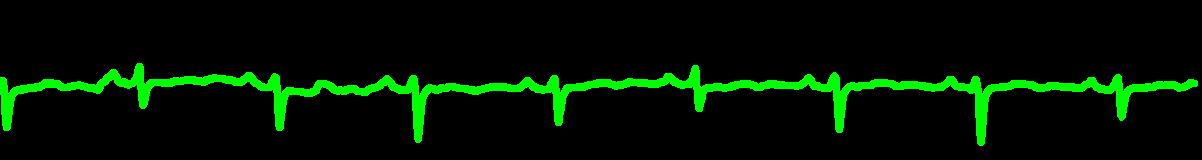

In [ ]:
def cropped_images(canvas):
  aug_image1=canvas[:,0:1200]
  aug_image2=canvas[:,755:]
  image_list=[aug_image1,aug_image2]
  return image_list

cropped_images_list=cropped_images(canvas)
cv2_imshow(cropped_images_list[0])
cv2_imshow(cropped_images_list[1])

In [ ]:
!pip install albumentations


In [ ]:
import albumentations as A
import matplotlib.pyplot as plt


def augmented_images(image_list):
  augmented_images =[]
  for canvas in image_list:
      rotate = A.Compose([
          A.Rotate(p=0.67, limit=(-2, 2))
      ])

      for _ in range(3):
        image_matrix1=rotate(image=canvas)["image"]
        crop=A.OneOf([
                A.RandomCrop(width=800, height=160,p=1),
                A.RandomCrop(width=640, height=160,p=1),
                A.RandomCrop(width=960, height=160,p=1),
                A.RandomCrop(width=1120, height=160,p=1)
        ])
        image_matrix2=crop(image=image_matrix1)["image"]
        augmented_images.append(image_matrix2)
  return augmented_images



def save_images(augmented_images):
 for i, img in enumerate(augmented_images):
    cv2.imwrite(f'/content/Augmented_{i + 1}.jpeg', img)


augmented_images_list=augmented_images(cropped_images_list)
# len(augmented_images_list)
save_images(augmented_images_list)

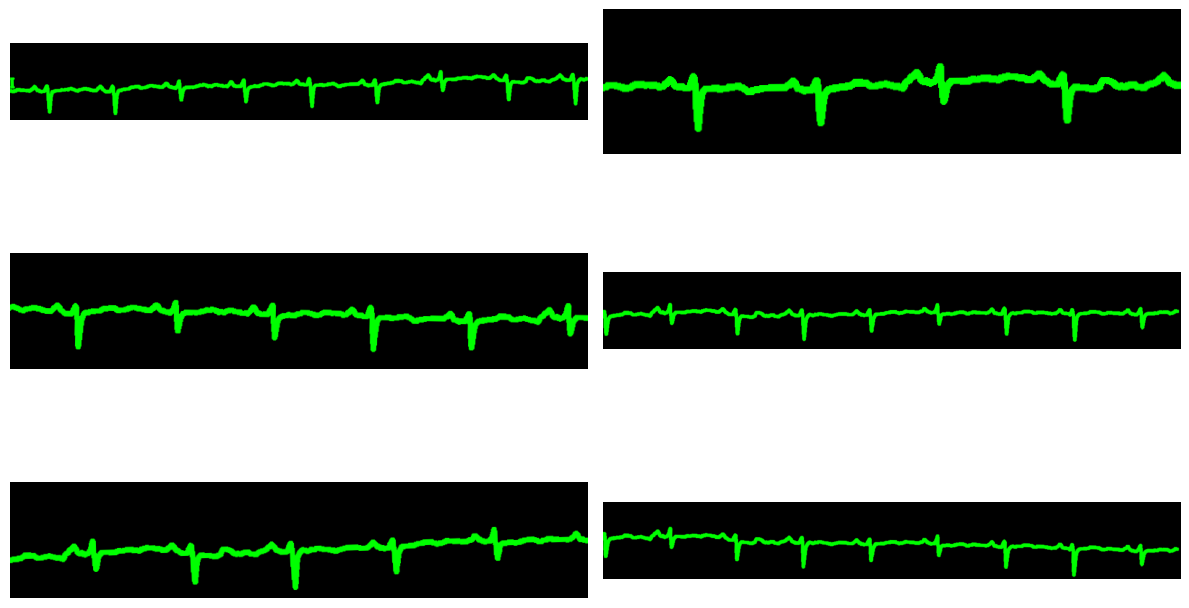

In [ ]:
def report_to_monitor_conversion(image):
  new_image=make_colors_white(image, threshold=30)
  canvas=Boundary_detection(new_image)
  cropped_image_list=cropped_images(canvas)
  augmented_images_list=augmented_images(cropped_image_list)
  save_images(augmented_images_list)
  return augmented_images_list

augmented_images_list=report_to_monitor_conversion(image3)

def show_images(images, rows, cols, figsize=(12, 8)):
    """
    Display a list of images in a grid layout.

    Parameters:
    - images: List of images to be displayed.
    - rows: Number of rows in the grid.
    - cols: Number of columns in the grid.
    - figsize: Tuple specifying the size of the figure.
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        # Check if there are more images than the grid can accommodate
        if i < len(images):
            ax.imshow(images[i], cmap='gray')  # Assuming images are in grayscale
            ax.axis('off')
        else:
            ax.axis('off')  # Turn off axis for empty subplots

    plt.tight_layout()
    plt.show()

# Example usage:
show_images(augmented_images_list, rows=3, cols=2)